In [10]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN, zadeh_s_norm, probabilistic_s_norm
import numpy as np
from ANFIS import ANFIS
import time
from sklearn.model_selection import train_test_split

<H1>Zadanie</H1>

Zmodyfikuj implementację ANFIS tak, aby tworzone przez niego reguły mogły korzystać zarówno z t-norm, jak i s-norm. Dodaj obsługę trzeciej zmiennej wejściowej. Naucz model ANFIS funkcji

f(x,y,z) = x*y + x*z + y*z

In [11]:
%matplotlib auto

Using matplotlib backend: TkAgg


In [12]:
%matplotlib inline

In [28]:
x = np.arange(0, 1.1, 0.1)
x,y,z = np.meshgrid(x, x, x)

dataX = x.flatten()
dataY = y.flatten()
dataZ = z.flatten()
# dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXYZ = np.column_stack((dataX,dataY,dataZ))

data_labels = np.zeros(shape=(len(dataX)))

for sample in range(len(dataX)):
    data_labels[sample] = round(dataX[sample] * dataY[sample] + dataX[sample] * dataZ[sample] + dataY[sample] * dataZ[sample], 4)

In [29]:
# mf1 = [[0, 0.05, 0.1, 0.1], [0.2, 0.05, 0.1, 0.1], [0.4, 0.05, 0.1, 0.1], [0.6, 0.05, 0.1, 0.1], [0.8, 0.05, 0.1, 0.1], [1, 0.05, 0.1, 0.1]]
# mf1 = [[0, 0.1, 0.15, 0.15], [0.25, 0.1, 0.15, 0.15], [0.5, 0.1, 0.15, 0.15], [0.75, 0.1, 0.15, 0.15]]#, [1, 0.1, 0.15, 0.15]]
mf1 = [[0.3, 0.1, 0.15, 0.15], [0.6, 0.1, 0.15, 0.15], [0.9, 0.1, 0.15, 0.15]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2"])
varZ = FuzzyInputVariable_List_Trapezoids(mf1, "ZAxis", ["1","2"])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(dataXYZ, data_labels, test_size=0.2, random_state=25)

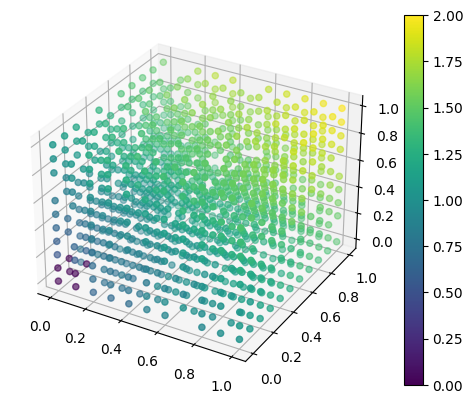

In [31]:
fis = ANFIS([varX, varY, varZ], X_train.T, y_train, operator_function=productN, second_operator_function=probabilistic_s_norm)

# print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

_ = fis.show_results()

100%|██████████| 25/25 [1:18:08<00:00, 187.53s/it]


Optymalizacja zakończona!
z blędem:   38.60698757643024
Liczba ew:  883128
Liczba it:  25
TIME elapsed:  4693.6974148750305


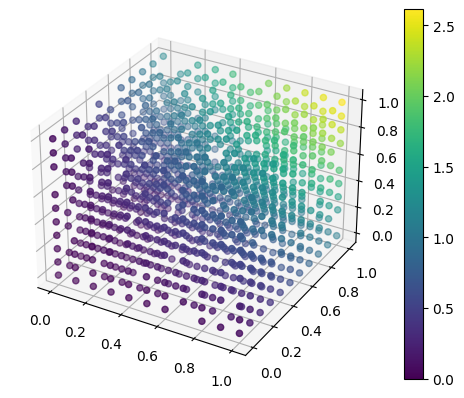

In [32]:
start = time.time()
fis.train(True, True, False, True, n_iter=25)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
_ = fis.show_results()

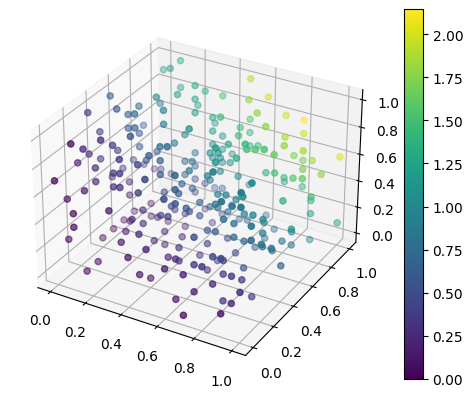

0.43 0.3714
2.04 1.8884
0.16 0.2374
0.11 0.0719
0.69 0.6901
1.12 1.1668
1.46 1.445
0.68 0.684
0.81 0.9536
0.4 0.395
1.1 1.0657
0.29 0.2899
0.18 0.2143
1.44 1.438
0.35 0.3456
0.57 0.556
0.98 0.9348
0.45 0.452
0.39 0.387
0.55 0.6079
0.18 0.1919
2.24 2.1454
0.24 0.2943
0.23 0.2429
0.15 0.136
0.53 0.5805
0.68 0.6808
0.27 0.2563
0.3 0.3214
0.31 0.2699
1.17 1.1875
0.02 0.0197
0.9 0.8871
0.9 0.9241
0.44 0.4557
2.04 1.9845
1.16 1.1826
0.56 0.5425
0.81 0.8151
0.62 0.6226
0.88 0.8871
0.94 0.9468
1.66 1.5361
1.0 0.9268
0.87 0.8383
0.54 0.5782
0.68 0.6796
2.0 1.9094
0.9 1.1494
0.24 0.3012
0.84 0.8479
0.51 0.479
0.07 0.0672
0.0 0.0514
0.0 0.0409
2.06 1.9853
0.84 0.8614
0.32 0.3544
1.01 1.0078
0.68 0.6811
0.47 0.4587
1.07 1.078
1.2 1.1632
1.09 1.2137
0.27 0.3653
0.18 0.1831
0.01 0.0094
0.21 0.2719
0.76 0.7395
0.25 0.2949
1.29 1.2765
0.63 0.6275
0.8 0.767
0.69 0.7795
0.95 0.9739
1.08 1.0909
0.26 0.2508
1.32 1.3148
0.56 0.5624
0.98 1.1019
0.81 0.8292
0.96 0.9401
1.25 1.2284
0.48 0.5068
0.14 0.1923
0.3

In [33]:
fis.training_data = X_test.T
fis.expected_labels = y_test
results = fis.show_results()
for i in range(len(y_test)):
    print(y_test[i], round(results.T[i][0], 4))